# Data Analytics Project: Titanic Dataset

Language: Python

Dataset name: Titanic - Machine Learning from Disaster

From: https://www.kaggle.com/competitions/titanic/data?select=test.csv

## 1. Load the Necessary Libraries

In [3]:
# load libraries

## data manipulation and transformation
import pandas as pd
import numpy as np

## data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset

In [4]:
# load dataset
df = pd.read_csv("train.csv")

## 3. Preview the Dataset

In [5]:
# preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Convert Data Types

In [7]:
# convert data types and store in df1

## make a copy of df
df1 = df.copy()

## define function to convert type
def convert_type(data, column, type):
    data[column] = data[column].astype(type)

## instantiate a list of columns to convert
columns_to_convert = ["Survived", "Pclass", "Embarked"]

## use for loop to convert the columns
for x in columns_to_convert:
    convert_type(df1, x, "category")

## check the results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB


## 5. Handle NA

In [8]:
# check the number of NA

## make a copy of df1
df2 = df1.copy()

## show the sum of NA in each column
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5.1 Age

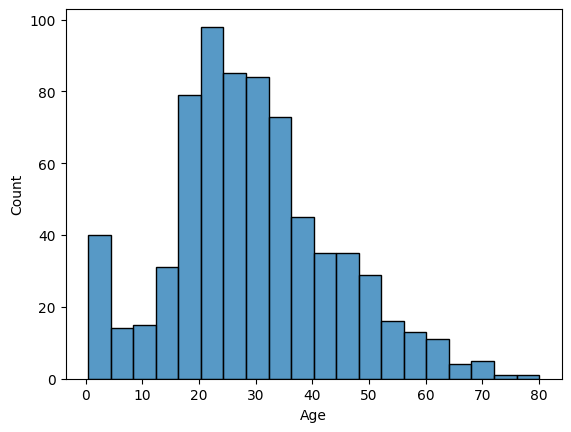

In [9]:
# check `age` distribution
sns.histplot(data=df2,
             x="Age")

plt.show()

In [10]:
# impute NA in `Age` with median since `Age` is slightly skewed
df2["Age"].fillna(df2["Age"].median(), inplace=True)

# check results
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB


C:\Users\sam_h\AppData\Local\Temp\ipykernel_7556\1599255348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Age"].fillna(df2["Age"].median(), inplace=True)


### 5.2 Cabin

In [11]:
# drop `Cabin` since it's mostly empty
df2.drop(columns=["Cabin"], inplace=True)

# check results
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.8+ KB


## 5.3 Embarked

In [12]:
# fill NA in `Embarked` with mode
df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)

# check results
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.8+ KB


C:\Users\sam_h\AppData\Local\Temp\ipykernel_7556\2755618746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)


In [13]:
# check if any NA is left
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 6. Explore the Dataset

In [14]:
# get summary stats

## make a copy of df2
df3 = df2.copy()

## describe the dataset
df3.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208
std,257.353842,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Based on the results:

(1) Skewness
- `SibSp`: positively skewed
- `Parch`: positively skewed
- `Fare`: positively skewed

(2) Spread
- `Fare`

(3) Outliers
- `Age`: min outliers

### 6.1 Handle Skewness

In [16]:
# log-transform `SibSp`, `Parch`, and `Fare`

## instantiate a list of columns to log-transform
col_to_log_transform = ["SibSp", "Parch", "Fare"]

## for loop through the list
for x in col_to_log_transform:
    df3[x + "_log"] = np.log1p(df3[x])

In [22]:
## check the results

### before log transformation
df3[["SibSp", "Parch", "Fare"]].skew()

SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

In [23]:
### after log transformation
df3[["SibSp_log", "Parch_log", "Fare_log"]].skew()

SibSp_log    1.661245
Parch_log    1.675439
Fare_log     0.394928
dtype: float64

Based on the results:

- `SibSp_log`: moderately skewed 
- `Parch_log`: moderately skewed
- `Fare_log`: relatively normally distributed

### 6.2 Handle Outliers

In [29]:
# make a copy of df3
df4 = df3.copy()

In [30]:
# check summary stats
df4.describe()

,PassengerId,Age,SibSp,Parch,Fare,SibSp_log,Parch_log,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208,0.281839,0.217682,2.962246
std,257.353842,13.019697,1.102743,0.806057,49.693429,0.462838,0.411680,0.969048
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,2.187218
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,2.737881
75%,668.500000,35.000000,1.000000,0.000000,31.000000,0.693147,0.000000,3.465736
max,891.000000,80.000000,8.000000,6.000000,512.329200,2.197225,1.945910,6.240917


Based on the results, column with potential outliers is `Age`

<Axes: xlabel='Age'>

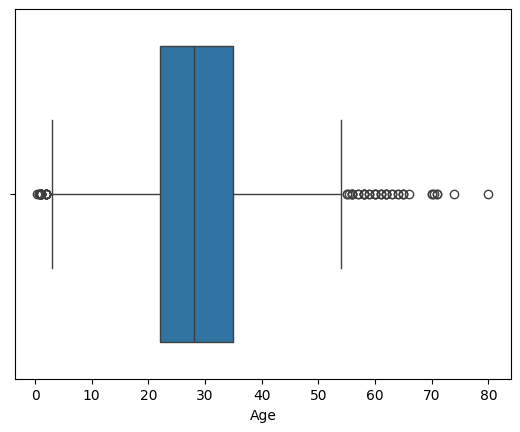

In [31]:
# visualise `Age`
sns.boxplot(data=df4, x="Age")

I decided to keep the outliers in `Age` for now as they may represent real edge cases.

### 6.3 Explore the Relationships Between Independent and Dependent Variables

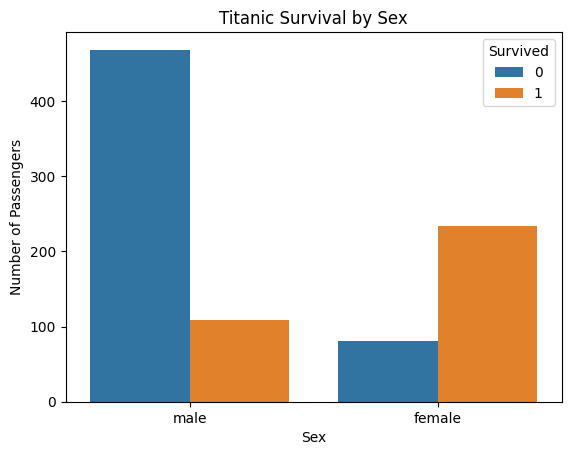

In [58]:
# `Sex` vs `Survived`
sns.countplot(x="Sex",
              hue="Survived",
              data=df4)

plt.title("Titanic Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")

plt.show()